<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlib01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

1. matplotlibで数直線とか、ただの三角とか描いてみる。
1. いろいろ美しい画像がネットにあるが、数直線とかただの三角形とかがない。
1. 本家サイト https://matplotlib.org/ などを参考にいろいろ実験してみる。

参考サイト: 
1. https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
1. https://qiita.com/yohm/items/1daa5aabbdb1e8edbf26
1. https://www.python.ambitious-engineer.com/archives/2673
1. https://tutorials.chainer.org/ja/12_Introduction_to_Matplotlib.html
1. https://aiacademy.jp/media/?p=154


# OO-style vs. pyplot (matlab) style について

と、本家サイトのどこかに書いてあったと思うが、通常 Jupyter で使うときは Matlab に近い、ここでいう pyplot style というので書くが、本当は OO-style がお勧め、とある。 OO-style も pyplot なので、話はややこしいが、`dir()` や `help()` を使う際に若干違うような気がするので、なるべく OO-style で書きたい。

次の、点を打つ、だけのコードについて、pyplot style で fig や ax を作らずに、同じ結果を得ることができ、なおかつその方がコード量が少なくて済むが、考え方が違う。 fig、ax というオブジェクトがあって、そこに使えるメソッドがあって、そのメソッドを通じてオブジェクトを操作する、という方が頭の中の構造が単純化されている。調べるときも、fig に使えるメソッドは何か、ax に使えるメソッドはなにか、というように焦点を絞れる。ということではないか。



# 点を打つ


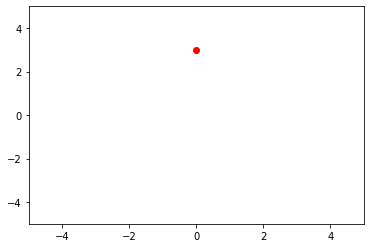

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# fig, ax = plt.subplots () # こうすると、fig と ax が一度につくれる。
fig = plt.figure (figsize=(6,4))
ax = fig.add_subplot(xlim=(-1,3), ylim=(-1,4))

ax.axis([-5,5,-5,5]) # ax を作ってから、こうして座標を変えることができる。

ax.plot([0],[3],'ro')


In [ ]:
fig.get_size_inches()

array([6., 4.])

fig で描画エリアを得て、ax が描画エリア内のグラフ(複数可)らしい。

1. 描画エリアの大きさはどうやって指定するのか。 => figsize=(6,4)とか。
1. fig と ax を別々に作ることはできるのか。 => plt.figure(), add_subplot(), subplot(), subplots()
1. fig で使えるメソッドに set_figsize はあるか。=> set_figheight, set_figwidth
1. plt.subplots の help を読む。=> plt.figure, plt.subplot, plt.axes, Figure.subplots, Figure.add_subplot の help も読もう。
1. 0 スタートの座標軸を描けるか。




In [ ]:
import matplotlib.pyplot as plt
dir(plt.Figure)

In [ ]:
help(plt.Axes)

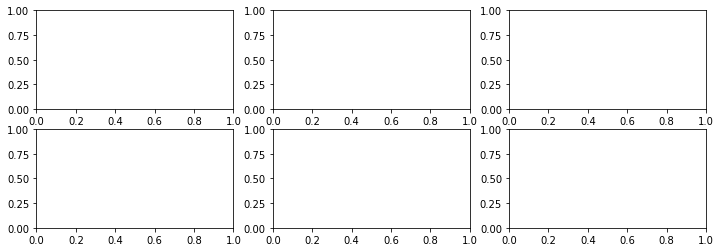

In [ ]:
fig = plt.figure(num=3,figsize=(12,4))
ax = fig.subplots(2, 3)

In [ ]:
fig.number

3

次の例は plt.subplots の help にある example 。

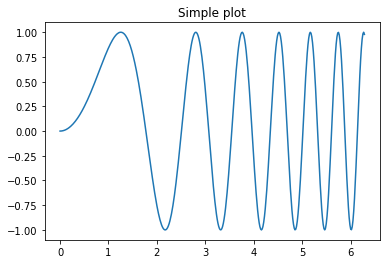

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show() # plt.show() しなくても図は描けているが、コードセル最後の式の返り値も表示されてしまうので、plt.show() するのがよいだろう。

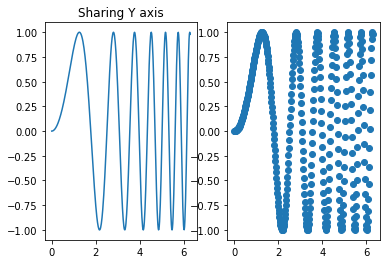

In [ ]:
#import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

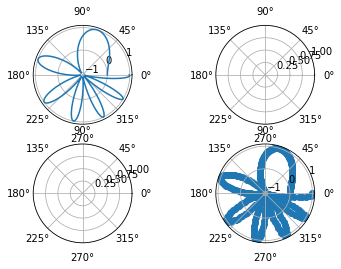

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
# fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5138fada58>,
       dtype=object))

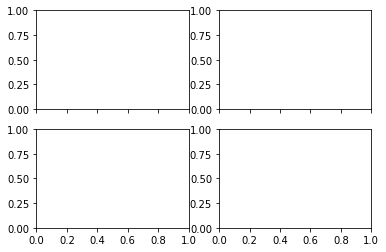

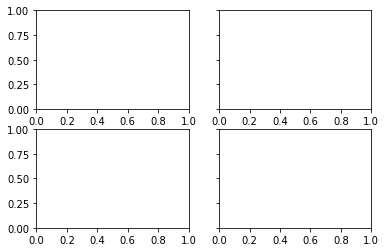

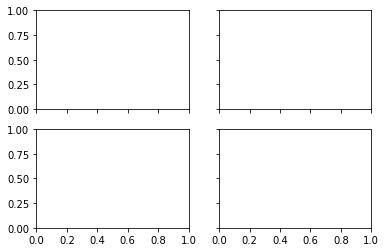

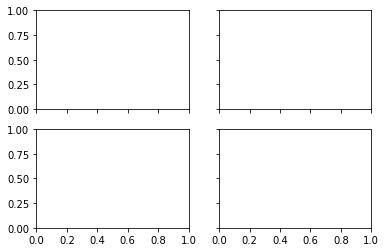

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)


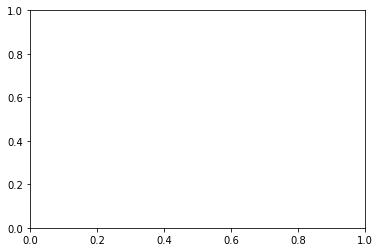

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [ ]:
fig.number

10

In [ ]:
import numpy as np
arr = [[1, 2], [3, 4]]
# ndarray を作る
a = np.array(arr)
print (type (arr))
print (type (a))
print (a)
print (a.ndim) # 次元数
print (a.shape) # m * n
print (a.size) # 要素数
print (a.dtype) # データ型 int とか float とか
print (a.data)

<class 'list'>
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
2
(2, 2)
4
int64


In [ ]:
np.ndarray?

# 三角形を描く

1. 三角形を描く。
2. 座標を消す。
3. A, B, C という頂点を振る。

# いまここ

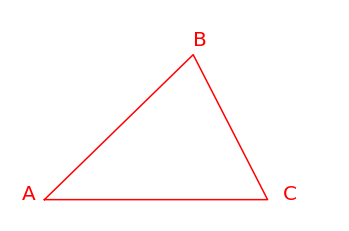

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# fig, ax = plt.subplots ()
fig = plt.figure (figsize=(6,4), facecolor='w')
ax = fig.add_subplot(xlim=(-0.5,4), ylim=(-0.5,4), )


x = [0, 2, 3, 0]
y = [0, 3, 0, 0]
ax.plot(x, y,'r-')

ax.text(-0.3,0.0,'A',color='red',fontsize=20)
ax.text(2.0,3.2,'B',color='red',fontsize=20)
ax.text(3.2,0.0,'C',color='red',fontsize=20)

ax.set_axis_off()
plt.show()

とりあえず描けた、としよう。

# Colabにようこそ、の例


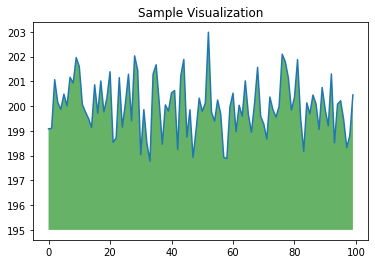

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

えっととりあえずの目的はグラフを描くことではなく、数直線や図形なのでその辺を選んでドキュメントや作例を見ていこう。

# 数直線


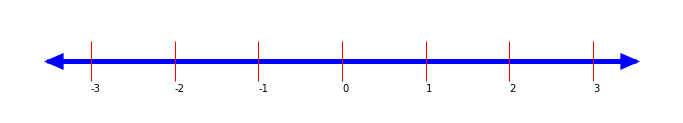

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.figure(figsize=(12,2)).add_subplot(xlim=(-4,4), ylim=(0, 1.0))
fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(xlim=(-4,4), ylim=(0, 1.0))

# blue arrow
ax.arrow(-3.5, 0.5, 7, 0.0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.arrow(3.5, 0.5, -7, 0, head_width=0.1, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
ax.set_axis_off()

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
ax.plot(x, y, 'r|', ms="40", label="数直線")
xy = zip (x, y)
xy_name = zip (xy, data_name)
for (i, name) in zip (xy, data_name) :
    ax.annotate(name,i, xycoords='data', xytext=(0,-30), textcoords='offset points')

plt.show()

### 参考 matplotlib  arrow 数直線
で検索

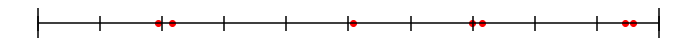

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#テキトーな配列を生成
rand_size = 7 #配列のサイズ
rand = np.random.random_sample(rand_size) #テキトーな配列を生成
rand = sorted(rand) #ソート
y = [0]*rand_size #y=0

#数直線
fig,ax=plt.subplots(figsize=(10,10)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
# pylab.box(False) #枠を消す
ax.axis("off")
plt.show()

In [ ]:
[0]*7

[0, 0, 0, 0, 0, 0, 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


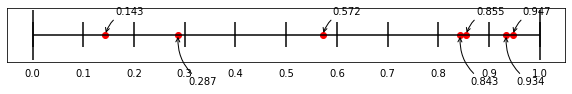

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rand_size = 7 
rand = np.random.random_sample(rand_size) # 0-1の間のrandomをrand_size個生成
rand = sorted(rand) 
y = [0]*rand_size # y=0 をrand_size個生成

#数直線
fig,ax=plt.subplots(figsize=(10,10)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定

#数直線上の数値を表示
for i in range(int(rand_size/2)+1):
    ax.annotate('{0:.3f}'.format(rand[2*i]),
                 xy=(rand[2*i],y[2*i]),
                 xytext=(10, 20),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.3")
                )

for i in range(int(rand_size/2)):
    ax.annotate('{0:.3f}'.format(rand[2*i+1]),
                 xy=(rand[2*i+1],y[2*i+1]),
                 xytext=(10, -50),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-.3")
                )

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
# ax.set_axis_off()
plt.show()

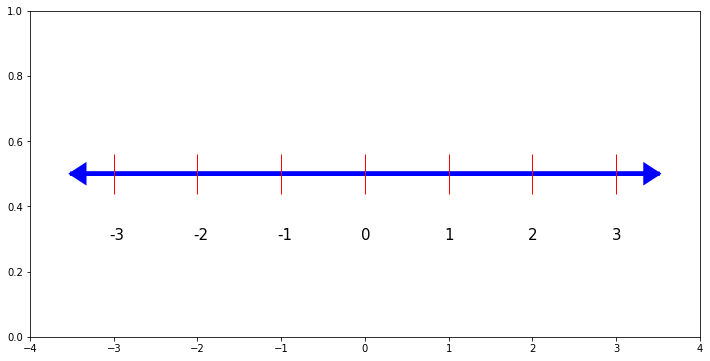

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

ax=plt.figure(figsize=(12,6)).add_subplot(xlim=(-4,4), ylim=(0, 1.0))

plt.arrow(-3.5, 0.5, 7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
plt.arrow(3.5, 0.5, -7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
plt.plot(x, y, 'r|', ms="40")

for (i, j, name) in zip (x, y, data_name) :
    plt.text(i, j, name, fontsize=15, position=(i-0.05, j-0.2))

# plt.savefig("numberline.svg")
plt.show()

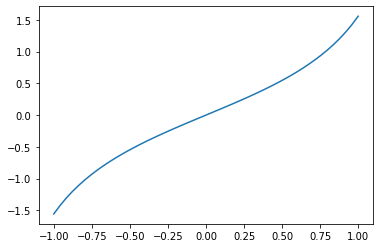

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace (-1, 1)
y = np.tan(x)

plt.plot(x, y)
plt.show()

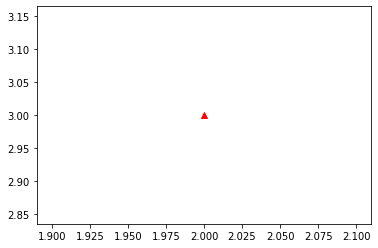

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(2,3, "r^")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot?

# 点をプロットする

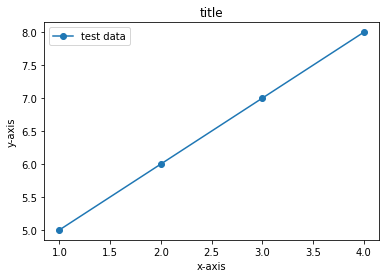

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [5,6,7,8]
plt.plot(x, y, 'o-', label="test data") 
plt.xlabel("x-axis")   
plt.ylabel("y-axis")    
# plt.legend(loc='best')  
plt.legend()
plt.title("title")
plt.show()

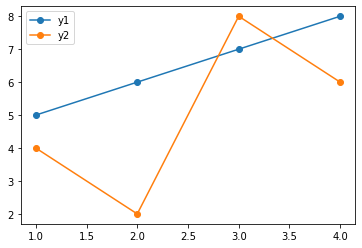

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y1 = [5,6,7,8]
y2 = [4,2,8,6]

plt.plot(x, y1, 'o-', label='y1')  
plt.plot(x, y2, 'o-', label='y2')  
plt.legend(loc='best')             
plt.show()

# 関数

`x = np.arange()` で範囲を決め、`y` を関数の値にしてプロットする。

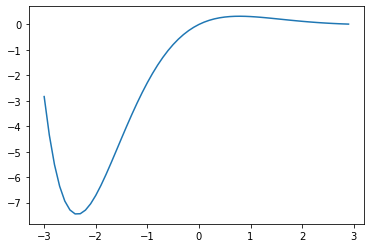

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3.0, 3.0, 0.1)
y = np.sin(x) * np.exp( -x)
plt.plot(x, y, '-')
plt.show()

# ログスケールにする

`plt.yscale('log')` で `y`軸がログスケールになる。

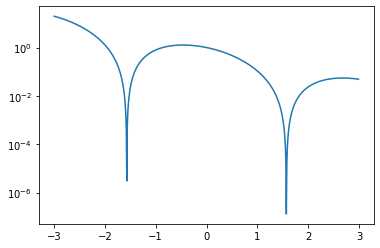

In [ ]:
import numpy as np
import matplotlib.pyplot ast pl

x = np.arange( -3.0, 3.0, 0.01 )
y = np.exp(-x) * np.cos(x)*np.cos(x)
plt.plot(x, y, '-')
plt.yscale('log')
plt.show()

In [ ]:
%%writefile test.dat
1 2 4
3 4 9
5 6 2
7 8 4

Writing test.dat


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The plotfile function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  after removing the cwd from sys.path.


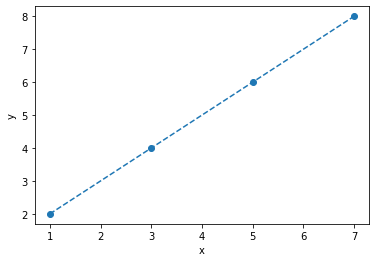

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plotfile('test.dat', cols=(0,1), names=('x','y'), delimiter=' ', marker='o', linestyle='--')

plt.show()

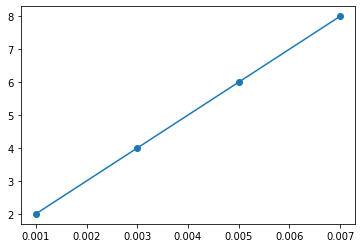

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dat = np.loadtxt("test.dat", comments='#', delimiter=' ')
plt.plot( dat[:,0]/1000, dat[:,1], 'o-' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The plotfile function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The plotfile function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


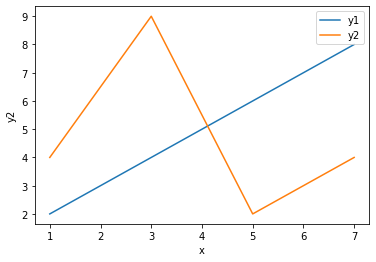

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

names = ('x','y1','y2')
plt.plotfile('test.dat', cols=(0,1), names=names, delimiter=' ', label="y1")
plt.plotfile('test.dat', cols=(0,2), names=names, delimiter=' ', label="y2", newfig=False)
plt.legend(loc='best')
plt.show()

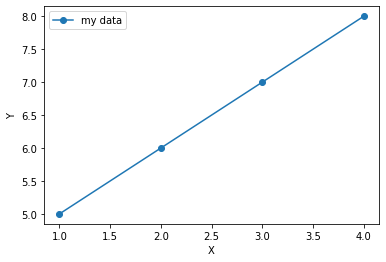

In [ ]:
plt.figure()     # bufferのクリア
x = [1,2,3,4]
y = [5,6,7,8]
plt.plot(x, y, 'o-', label="my data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.savefig('plot.png')

In [ ]:
!ls


plot.png  sample_data  test.dat


# サインカーブ

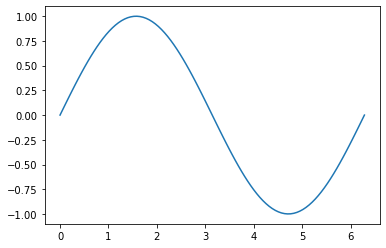

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)

plt.plot(x, y)
plt.show()


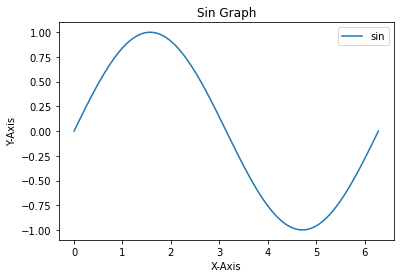

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)

plt.plot(x, y, label='sin')
plt.title('Sin Graph')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

plt.show()


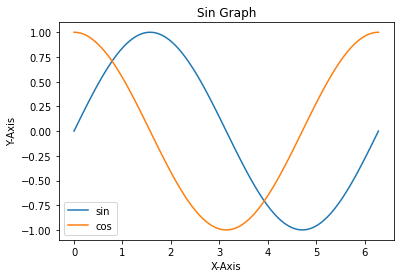

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi   #mathモジュールのπを利用

x = np.linspace(0, 2*pi, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = np.sin(x)
cos_y = np.cos(x)

plt.plot(x, y, label='sin')
plt.plot(x, cos_y, label='cos')

plt.title('Sin Graph')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

plt.show()

# Usage Guide

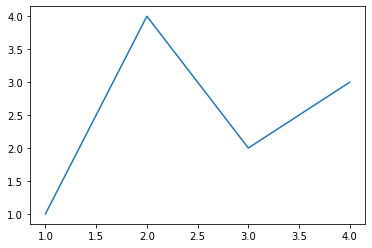

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots () # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

### Parts of a Figure

Title, Legend, Grid, Line (line plot), Major tick, Minor tick, Major tick label, Y axis label, Markers (scatter plot), Figure, Axes, Spines, X axis label, Minor tick label, canvas

<Figure size 432x288 with 0 Axes>

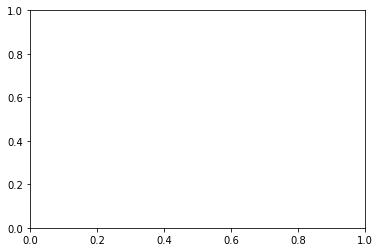

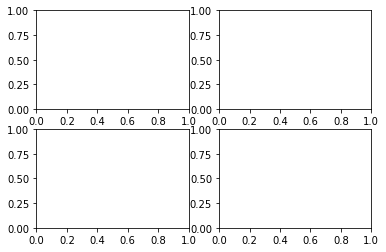

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
# ax.set_axis_off()
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [ ]:
dir(ax)

In [ ]:
# convert a pandas.DataFrame

# a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
# a_asarray = a.values

In [ ]:
# convert a numpy.matrix

# b = np.matrix([[1, 2], [3, 4]])
# b_asarray = np.asarray(b)

### OO-style vs. pyplot (matlib) style


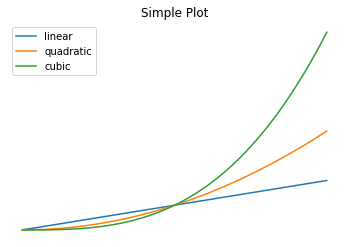

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.set_axis_off()
# plt.show()

In [ ]:
print(np.linspace(0,49, 50))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


In [ ]:
ax.set_axis_off?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

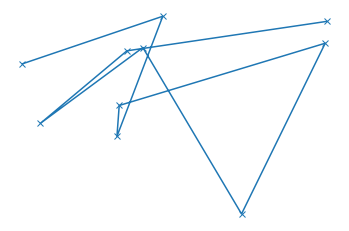

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 10)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})
ax.set_axis_off()
# ax.axis("off")

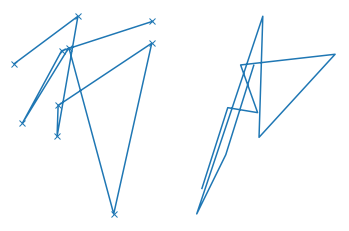

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': ''})
ax1.set_axis_off()
ax2.set_axis_off()
# ax.axis("off")
plt.show()


Backends
https://matplotlib.org/tutorials/introductory/usage.html#backends

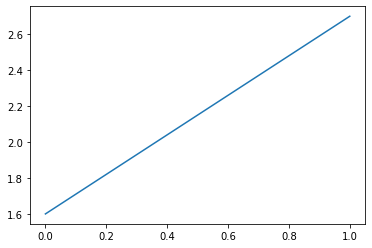

In [ ]:
import matplotlib.pyplot as plt
# plt.ion()
plt.ioff()
plt.plot([1.6, 2.7])

Text(0.5, 0, 'index')

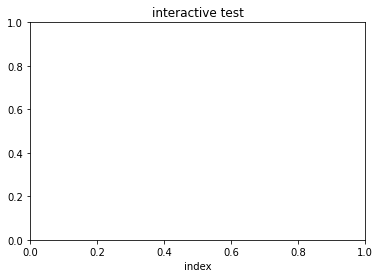

In [ ]:

plt.title("interactive test")
plt.xlabel("index")

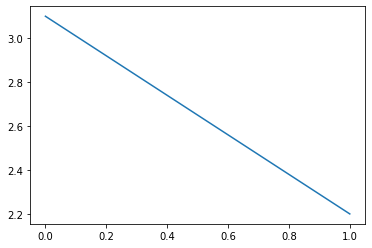

In [ ]:
ax = plt.gca()
ax.plot([3.1, 2.2])
plt.draw()

# ax.set_axis_off() を発見!!!!

どうやって発見したかを書いておこう。 dir(ax) で subplot で作られた描画領域にどんなメソッドがあるか見れる。その中に set_axis_off というのがあったので使ってみて見つけた。

使ってみて、それからhelpでdocstringを読んで、それで完璧。

matplotlibはpythonのモジュールなので、pythonのhelpやdirが使えるので、マニュアルがなくても、マニュアルに細かいことが書いてなくても、やりたいことが言語化できれば探せる。

ax.axis("off") でも消えるって。 => 消えたけど、plt.show()したら消えてなかった。ax.set_axis_off()の方がいいね。

もう一つ、pylab.box(False) というのを使っている人がいた。これも import するモジュールが１つ増えるのでボツ。




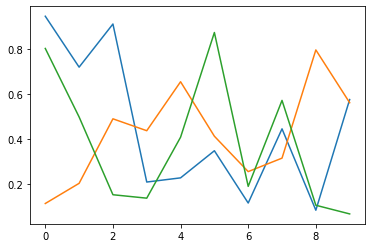

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

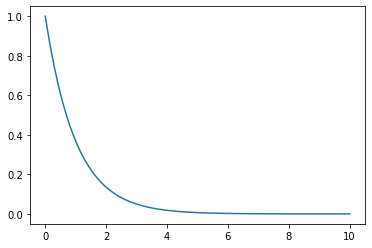

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

a = np.linspace(0,10,100)
b = np.exp(-a)
ax.plot(a,b)
plt.show()

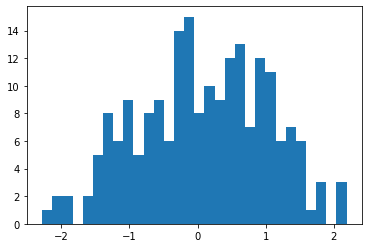

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
from numpy.random import normal,rand
fig, ax = plt.subplots() 

x = normal(size=200)
ax.hist(x,bins=30)
plt.show()

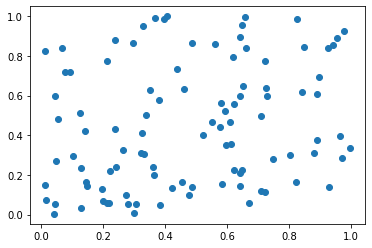

In [ ]:
# from wikipedia
import matplotlib.pyplot as plt
from numpy.random import rand
fig, ax = plt.subplots() 

a = rand(100)
b = rand(100)
ax.scatter(a,b)
plt.show()

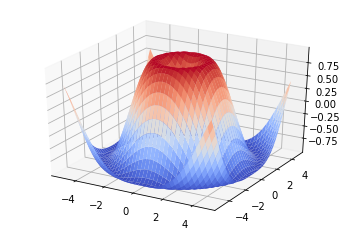

In [ ]:
# from wikipedia

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

# Pyplot tutorial

ここから
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

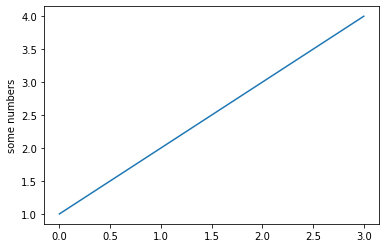

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

ax.plot([1, 2, 3, 4])
ax.set_ylabel('some numbers')
plt.show()

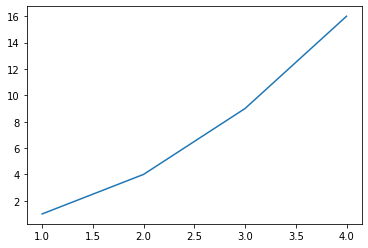

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
ax.axis([0, 6, 0, 20])
plt.show()

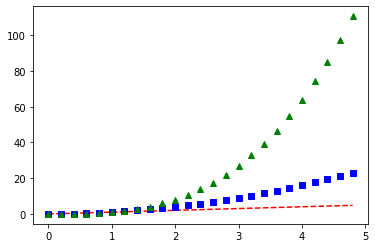

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
ax.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

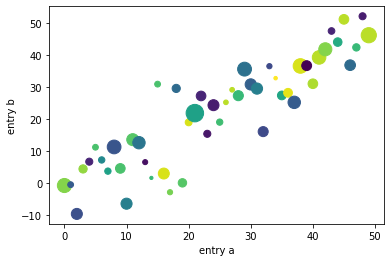

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() 

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
plt.show()

https://minus9d.hatenablog.com/entry/2015/01/26/225731
matplotlibをオブジェクト指向スタイルで使う その1


https://qiita.com/NTeTN/items/5a16389a1cbfad532a8f
ゼロからはじめるmatplotlib〜4.オブジェクト指向スタイル〜

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'linewidth'


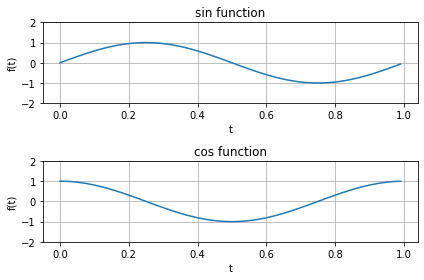

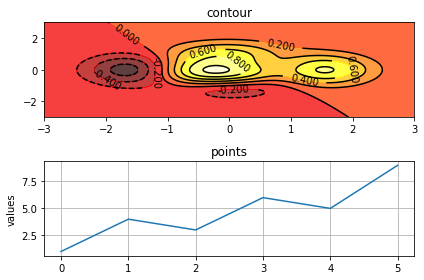

In [ ]:

t = np.arange(0.0, 1.0, 0.01)

####################
#1つ目のウィンドウ
####################
fig1 = plt.figure(1)

################################
#1つ目のウィンドウ 1つ目のグラフ
################################
ax1 = fig1.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax1.grid(True)
ax1.set_ylim( (-2,2) )
ax1.set_xlabel('t')
ax1.set_ylabel('f(t)')
ax1.set_title('sin function')

################################
#1つ目のウィンドウ 2つ目のグラフ
################################
ax2 = fig1.add_subplot(212)
ax2.plot(t, np.cos(2*np.pi*t))
ax2.grid(True)
ax2.set_ylim( (-2,2) )
ax2.set_xlabel('t')
ax2.set_ylabel('f(t)')
ax2.set_title('cos function')



####################
# 2つ目のウィンドウ
####################
fig2 = plt.figure(2)

################################
# 2つ目のウィンドウ 1つ目のグラフ
################################
# 等高線
ax1 = fig2.add_subplot(211)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

ax1.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = ax1.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
ax1.clabel(C, inline=1, fontsize=10)
ax1.set_title('contour')

################################
# 2つ目のウィンドウ 2つ目のグラフ
################################
ax2 = fig2.add_subplot(212)
ax2.plot([1, 4, 3, 6, 5, 9])
ax2.grid(True)
ax2.set_ylabel('values')
ax2.set_title('points')



################################
# 2つのウィンドウを表示
################################
fig1.tight_layout()  # グラフの文字がかぶらないようにする
fig2.tight_layout()  # グラフの文字がかぶらないようにする
plt.show()



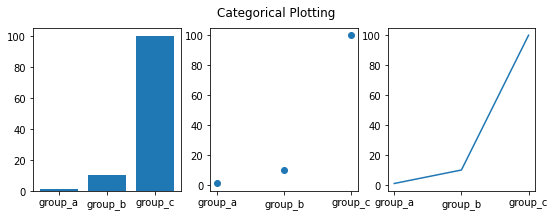

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

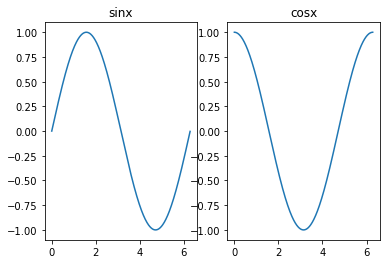

In [ ]:
x = np.arange(0,2*np.pi,0.01)
fig, ax = plt.subplots(1,2)

# 左のグラフ
ax[0].plot(x, np.sin(x))
ax[0].set_title("sinx")


# 右のグラフ
ax[1].plot(x, np.cos(x))
ax[1].set_title("cosx");

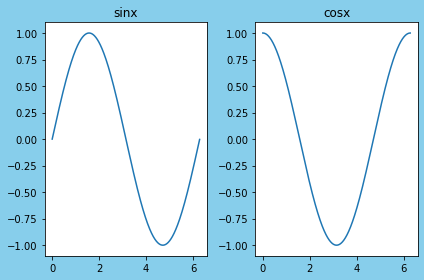

In [ ]:
x = np.arange(0,2*np.pi,0.01)

# facecolorで外側をskyblueにしてみた。
fig, ax = plt.subplots(1,2, facecolor='skyblue')

# 左のグラフ
ax[0].plot(x, np.sin(x))
ax[0].set_title("sinx")

# 右のグラフ
ax[1].plot(x, np.cos(x))
ax[1].set_title("cosx");

# グラフの配置が自動調整されます。
fig.tight_layout()

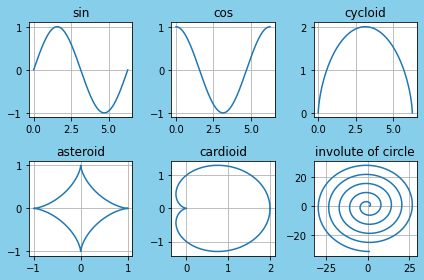

In [ ]:
theta = np.arange(0,2*np.pi,0.01)

# 全体のサイズ調節
fig, ax = plt.subplots(2, 3, facecolor='skyblue')

# 右上[0,0]
ax[0,0].plot(theta, np.sin(theta))
ax[0,0].set_title("sin")
ax[0,0].grid()

# 中上[0,1]
ax[0,1].plot(theta, np.cos(theta))
ax[0,1].set_title("cos")
ax[0,1].grid()

# 右上[0,2]
ax[0,2].plot(theta-np.sin(theta), 1-np.cos(theta))
ax[0,2].set_title("cycloid")
ax[0,2].grid()

# 左下[1,0]
ax[1,0].plot(np.power(np.cos(theta),3), np.power(np.sin(theta),3))
ax[1,0].set_title("asteroid")
ax[1,0].grid()

# 中下[1,1]
ax[1,1].plot((1+np.cos(theta))*np.cos(theta), (1+np.cos(theta))*np.sin(theta))
ax[1,1].set_title("cardioid")
ax[1,1].grid()

# 右下[1,2]
theta2 = np.arange(0,10*np.pi,0.01) # インボリュート曲線用
ax[1,2].plot(np.cos(theta2)+theta2*np.sin(theta2), np.sin(theta2)-theta2*np.cos(theta2))
ax[1,2].set_title("involute of circle")
ax[1,2].grid()

# グラフ位置の自動調整
fig.tight_layout()

# text example

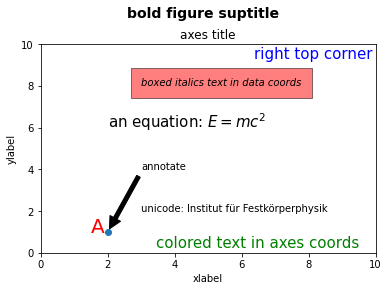

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.text(0.99, 0.99, 'right top corner',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='blue', fontsize=15)

ax.text(1.5,1.0,'A',color='red',fontsize=20)

ax.plot([2], [1], 'o')

ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()